<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/DL_Models/Transformer_based_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Sameer-Tahir/Project_DS.git

Cloning into 'Project_DS'...
remote: Enumerating objects: 302, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 302 (delta 73), reused 6 (delta 6), pack-reused 113 (from 1)
Receiving objects: 100% (302/302), 16.75 MiB | 9.18 MiB/s, done.
Resolving deltas: 100% (97/97), done.


In [2]:
# Import libraries
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import json
from tensorflow.keras import layers, models, callbacks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras import layers, models, callbacks
import numpy as np, joblib
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
# -----------------------
# Load your splits
# -----------------------
train_df = pd.read_csv("dfk1_train.csv")
val_df   = pd.read_csv("dfk1_val.csv")
test_df  = pd.read_csv("dfk1_test.csv")

In [4]:
!unzip -o dl_preprocessed.zip

Archive:  dl_preprocessed.zip
  inflating: dl_data_windows.npz     
  inflating: label_encoder.pkl       
  inflating: scaler.pkl              


In [5]:
# Load arrays
data = np.load("dl_data_windows.npz", allow_pickle=True)
X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val     = data["X_val"],   data["y_val"]
X_test, y_test   = data["X_test"],  data["y_test"]
feature_cols     = data["feature_cols"].tolist()
classes          = data["classes"]

# Load encoder & scaler
le = joblib.load("label_encoder.pkl")
scaler = joblib.load("scaler.pkl")

print("✅ Data loaded successfully")
print("Train:", X_train.shape, y_train.shape)
print("Val:",   X_val.shape, y_val.shape)
print("Test:",  X_test.shape, y_test.shape)
print("Classes:", classes)

✅ Data loaded successfully
Train: (4835, 6, 222) (4835,)
Val: (591, 6, 222) (591,)
Test: (590, 6, 222) (590,)
Classes: ['aggressive-scan' 'cryptojacking' 'icmp-flood' 'icmp-fragmentation'
 'icmp-fragmentation_old' 'none' 'os-fingerprinting' 'os-scan' 'port-scan'
 'push-ack-flood' 'serice-detection' 'service-detection' 'syn-flood'
 'syn-stealth' 'synonymous-ip-flood' 'tcp-flood' 'udp-flood' 'vuln-scan']


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 6, 222)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 6, 64)     │     14,272 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_block_1 │ (None, 6, 64)     │     83,200 │ dense_5[0][0],    │
│ (TransformerBlock)  │                   │            │ transformer_bloc… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ transformer_bloc… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64)        │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      4,160 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 18)        │      1,170 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,802 (401.57 KB)

 Trainable params: 102,802 (401.57 KB)

 Non-trainable params: 0 (0.00 B)

Class Weights: {0: np.float64(1.8524904214559388), 1: np.float64(0.1967846967846968), 2: np.float64(2.633442265795207), 3: np.float64(2.827485380116959), 4: np.float64(5.481859410430839), 5: np.float64(0.14662178554099953), 6: np.float64(2.7409297052154193), 7: np.float64(5.715130023640662), 8: np.float64(1.6788194444444444), 9: np.float64(2.633442265795207), 10: np.float64(5.596064814814815), 11: np.float64(2.41991991991992), 12: np.float64(2.686111111111111), 13: np.float64(1.9897119341563787), 14: np.float64(2.7409297052154193), 15: np.float64(2.71324354657688), 16: np.float64(2.7980324074074074), 17: np.float64(1.7556281771968048)}
Epoch 1/100
150/152 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5516 - loss: 2.5866
Epoch 1: val_accuracy improved from -inf to 0.72420, saving model to Transformer_best.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.5539 - loss: 2.5794 - val_accuracy: 0.7242 - val_loss: 0.6962 - learning_rate: 0.0010
Epoch 2/100
151/152 ━━━━━━━━━━━━━

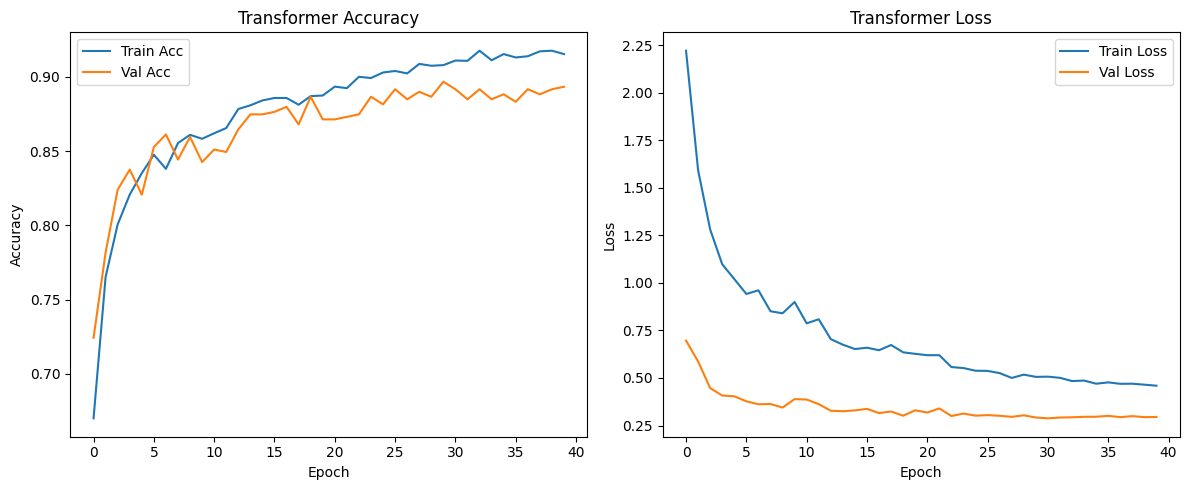

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

✅ Transformer Results
Accuracy: 0.888135593220339
Macro-F1: 0.7133323337381009
                        precision    recall  f1-score   support

       aggressive-scan       0.85      0.61      0.71        18
         cryptojacking       1.00      0.98      0.99       165
            icmp-flood       0.67      0.77      0.71        13
    icmp-fragmentation       1.00      1.00      1.00        13
icmp-fragmentation_old       0.25      0.17      0.20         6
                  none       1.00      1.00      1.00       220
     os-fingerprinting       0.34      0.92      0.50        13
               os-scan       0.36      0.83      0.50         6
             port-scan       0.72      0.68      0.70        19
        push-ack-flood       1.00      1.00      1.00        12
      serice-detection       0.62      0.83      0.71         6
     service-detection       0.30      0.21      0.25        14
             syn-flood       1.00      1.00    

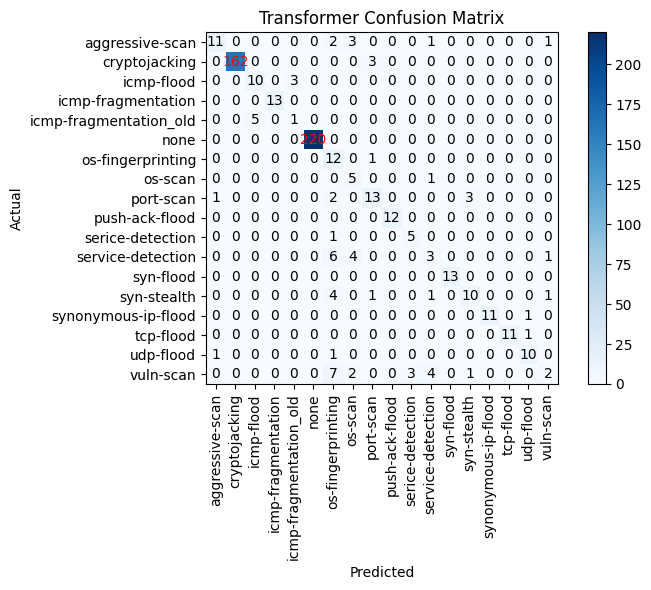

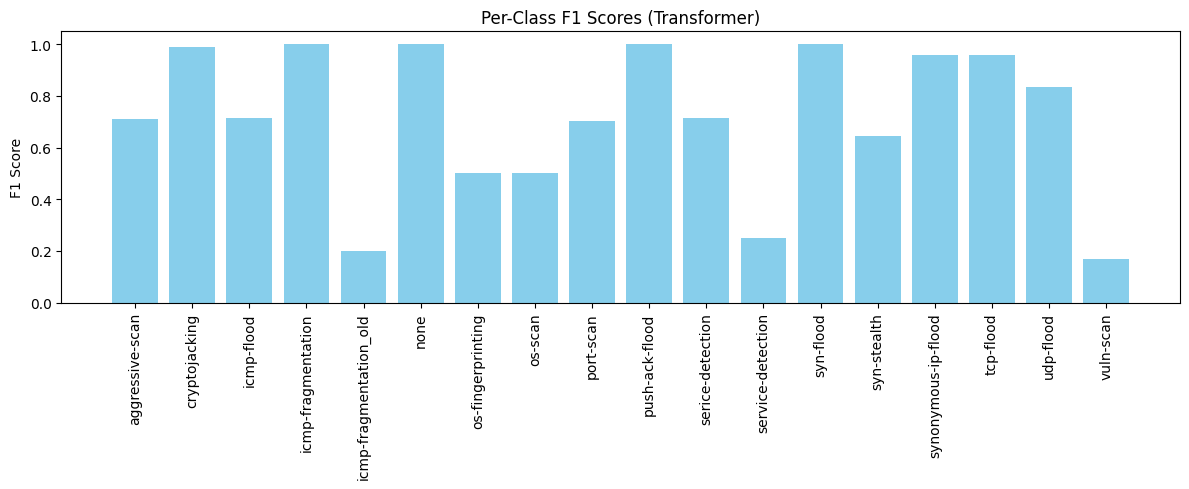

📂 Saved: Transformer_final.keras, results_transformer.json, Transformer_training_curves.png, Transformer_confusion_matrix.png, Transformer_f1_per_class.png


In [7]:
# -----------------------
# Transformer Block
# -----------------------
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = models.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


# -----------------------
# Build Transformer Model
# -----------------------
def build_transformer(window, n_features, n_classes):
    embed_dim = 64    # embedding size per token
    num_heads = 4     # multi-head attention heads
    ff_dim = 128      # hidden layer size in feed-forward network

    inputs = layers.Input(shape=(window, n_features))
    x = layers.Dense(embed_dim)(inputs)   # linear projection

    # Stacked Transformer Blocks
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
    x = transformer_block(x)
    x = transformer_block(x)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


# -----------------------
# Instantiate model
# -----------------------
transformer_model = build_transformer(X_train.shape[1], X_train.shape[2], len(classes))
transformer_model.summary()


# -----------------------
# Callbacks
# -----------------------
early_stop = callbacks.EarlyStopping(
    monitor="val_accuracy", patience=10, mode="max", restore_best_weights=True
)

lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, verbose=1
)

checkpoint = callbacks.ModelCheckpoint(
    "Transformer_best.keras", monitor="val_accuracy", save_best_only=True, verbose=1
)


# -----------------------
# Class Weights
# -----------------------
from sklearn.utils.class_weight import compute_class_weight

class_weights_array = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights_array))
print("Class Weights:", class_weights)


# -----------------------
# Train Model
# -----------------------
history_trans = transformer_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, lr_scheduler, checkpoint],
    class_weight=class_weights,
    verbose=1
)


# -----------------------
# Plot Accuracy & Loss
# -----------------------
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_trans.history["accuracy"], label="Train Acc")
plt.plot(history_trans.history["val_accuracy"], label="Val Acc")
plt.title("Transformer Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_trans.history["loss"], label="Train Loss")
plt.plot(history_trans.history["val_loss"], label="Val Loss")
plt.title("Transformer Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig("Transformer_training_curves.png")
plt.show()


# -----------------------
# Evaluate on Test Set
# -----------------------
y_pred_test = np.argmax(transformer_model.predict(X_test), axis=-1)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average="macro")
report = classification_report(
    y_test, y_pred_test, target_names=classes, zero_division=0
)
cm = confusion_matrix(y_test, y_pred_test)

print("\n✅ Transformer Results")
print("Accuracy:", test_acc)
print("Macro-F1:", test_f1)
print(report)


# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap="Blues")
plt.title("Transformer Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="red" if cm[i, j] > cm.max()/2 else "black")
plt.tight_layout()
plt.savefig("Transformer_confusion_matrix.png")
plt.show()


# -----------------------
# Per-Class F1 Scores
# -----------------------
from sklearn.metrics import precision_recall_fscore_support

prec, rec, f1, support = precision_recall_fscore_support(y_test, y_pred_test, zero_division=0)

plt.figure(figsize=(12, 5))
plt.bar(classes, f1, color="skyblue")
plt.xticks(rotation=90)
plt.title("Per-Class F1 Scores (Transformer)")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.savefig("Transformer_f1_per_class.png")
plt.show()


# -----------------------
# Save model + results
# -----------------------
transformer_model.save("Transformer_final.keras")

results = {
    "accuracy": float(test_acc),
    "macro_f1": float(test_f1),
    "report": report,
    "confusion_matrix": cm.tolist()
}

import json
with open("results_transformer.json", "w") as f:
    json.dump(results, f, indent=4)

print("📂 Saved: Transformer_final.keras, results_transformer.json, Transformer_training_curves.png, Transformer_confusion_matrix.png, Transformer_f1_per_class.png")


Transformer Results
Accuracy: 0.888135593220339
Macro-F1: 0.7133323337381009